## Generazione istanze

159.70284906663375

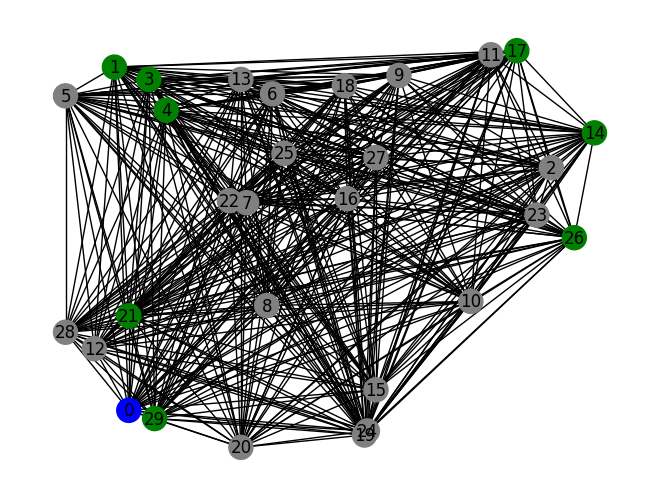

In [26]:
import networkx as nx 
import utility_function as uf

#generate a random graph
G=uf.random_euclidean_graph(30, 200)

#draw the graph with the type of node
uf.draw_graph(G)

#export in GML file
nx.write_gml(G, "istances/graph2.gml")
G[1][2]['weight']

## Euristica greedy e ad-hoc

Euristica Greedy per il problema GTSP. Alcune non sono greedy ma di ispirazione greedy.

### Nearest Neighbour (variante con autonomia)

A partire dal deposito di sceglie di spostarsi verso il cliente più vicino. Prima di farlo però si controlla che una volta raggiunto il nodo successivo sia possibile raggiungere la colonnina più vicina (altrimenti si resterebbe bloccati). Se non è possibile raggiungere la colonnina più vicina si sceglie la seconda più vicina e così via.

In alcuni potrebbe non riuscire a trovare una soluzione ammissibile e bloccarsi ritornando None.

Per evitare loop fra colonnine si tiene traccia di quelle già visitate e se si ritorna in una già vista si blocca l'algortimo ritornando None. Ogni volta che si visita un cliente si resetta la lista delle colonnine visitate.

È una variante dell'algoritmo Nearest Neighbour per il TSP.

In [1]:
import networkx as nx 
import utility_function as uf

def greedy_nearest_neighbour(G : nx.Graph, batteria_max : int):
    
    clienti = [node for node in G.nodes if G.nodes[node]['type'] == "cliente"]
    collonnine = [node for node in G.nodes if G.nodes[node]['type'] == "colonnina"]

    #inizializzazione
    nodo_attuale = 0
    batteria = batteria_max
    nodi_visitati = []
    nodi_da_visitare = clienti.copy() #devo anche tornare al deposito quindi lo devo visitare una seconda volta
    soluzione = [0]
    collonnine_visitate = [] #per evitare cicli
    batteria_per_nodo = [batteria_max] #per ogni nodo della soluzione salvo la batteria rimanente ()

    soluzione_trovata = True

    for _ in range(2): #sserve imporre che l'ultimo nodo sia il deposito (quando ho visitato tutti i nodi aggiungo il deposito ai nodi da visitare)
        while len(nodi_da_visitare) > 0:
            #print(nodi_da_visitare)
            #get the nearest node (cliente)
            nodo_prossimo = uf.get_nearest_node(G, nodo_attuale, nodi_da_visitare)

            #check if the battery is enough to go to the nearest node and to reach the nearest charging station
            if batteria - nodo_prossimo[0] - uf.get_nearest_node(G, nodo_prossimo[1], collonnine)[0] < 0:
            
                #print("batteria insufficiente")

                #go to the nearest charging station
                nodo_prossimo = uf.get_nearest_node(G, nodo_attuale, collonnine) #la colonnina più vicina
                
                #se vero allora sono in loop e non posso raggiungere nessun cliente
                if(int(nodo_prossimo[1]) in collonnine_visitate):
                    #print("sono in una colonnina ma non ho abbastanza batteria per raggiungere un cliente")
                    soluzione_trovata = False
                    break

                collonnine_visitate.append(nodo_prossimo[1])

                #aggiornamento dello stato
                batteria = batteria_max
                nodi_visitati.append(nodo_attuale)
                nodo_attuale = nodo_prossimo[1]
                soluzione.append(nodo_attuale)
                batteria_per_nodo.append(batteria)
            else:
                #aggiornamento dello stato
                batteria -= nodo_prossimo[0]
                nodi_visitati.append(nodo_attuale)
                nodo_attuale = nodo_prossimo[1]
                nodi_da_visitare.remove(nodo_attuale)
                soluzione.append(nodo_attuale)
                batteria_per_nodo.append(batteria)

                collonnine_visitate=[]
            
            #print("nodo attuale: ", nodo_attuale, "batteria: ", batteria, "nodi da visitare: ", nodi_da_visitare, "soluzione: ", soluzione)
        
        #print("torno al deposito")
        nodi_da_visitare=[0]

    if soluzione_trovata != False:
        #soluzione.append(0)
        #print("soluzione: ", soluzione)
        return soluzione, batteria_per_nodo
    else:
        return None
    

[1, 4, 5, 6, 7, 8, 10, 11, 13, 14]
nodo attuale:  4 batteria:  144.34314575050763 nodi da visitare:  [1, 5, 6, 7, 8, 10, 11, 13, 14] soluzione:  [0, 4]
[1, 5, 6, 7, 8, 10, 11, 13, 14]
nodo attuale:  10 batteria:  107.28913112320981 nodi da visitare:  [1, 5, 6, 7, 8, 11, 13, 14] soluzione:  [0, 4, 10]
[1, 5, 6, 7, 8, 11, 13, 14]
nodo attuale:  13 batteria:  65.42028829229318 nodi da visitare:  [1, 5, 6, 7, 8, 11, 14] soluzione:  [0, 4, 10, 13]
[1, 5, 6, 7, 8, 11, 14]
batteria insufficiente
nodo attuale:  3 batteria:  150 nodi da visitare:  [1, 5, 6, 7, 8, 11, 14] soluzione:  [0, 4, 10, 13, 3]
[1, 5, 6, 7, 8, 11, 14]
nodo attuale:  14 batteria:  111.7900536509144 nodi da visitare:  [1, 5, 6, 7, 8, 11] soluzione:  [0, 4, 10, 13, 3, 14]
[1, 5, 6, 7, 8, 11]
nodo attuale:  11 batteria:  84.13142027903574 nodi da visitare:  [1, 5, 6, 7, 8] soluzione:  [0, 4, 10, 13, 3, 14, 11]
[1, 5, 6, 7, 8]
nodo attuale:  5 batteria:  57.11290810682314 nodi da visitare:  [1, 6, 7, 8] soluzione:  [0, 4, 10, 

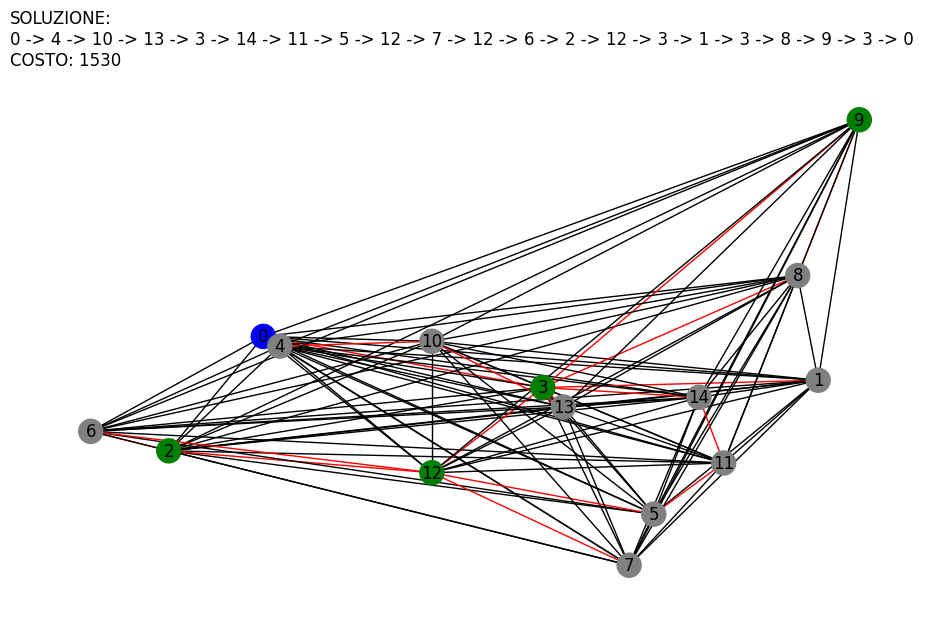

In [49]:
#RICHIEDE L'ESECUZIONE DELLA CELLA PRECEDENTE
import networkx as nx 
import utility_function as uf

#Caricamento del grafo da file
#scelta istanza
graph_file = "istances/graph.gml"
batteria_max = 150

#lettura grafo
G = nx.read_gml(graph_file, destringizer=int)

#applicazione algoritmo
soluzione, batteria_per_nodo = greedy_nearest_neighbour(G,batteria_max)

#controllo se la soluzione siste
if soluzione == None:
    print("soluzione non trovata. Batteria insufficiente per raggiungere tutti i clienti")
else:
    print("soluzione trovata:")
    print(soluzione)
    
    print("batteria_per_nodo:")
    print(batteria_per_nodo)

    costo = uf.costo(G, soluzione, batteria_per_nodo)
    print("costo: ", costo)

    #plot the solution
    uf.draw_solution(G, soluzione , costo)




### Random insertion

In [1]:
import networkx as nx 
import utility_function as uf
import random

def greedy_random_insertion(G : nx.Graph, batteria_max : int):
    
    clienti = [node for node in G.nodes if G.nodes[node]['type'] == "cliente"]
    collonnine = [node for node in G.nodes if G.nodes[node]['type'] == "colonnina"]

    #inizializzazione
    nodo_attuale = 0
    batteria = batteria_max
    nodi_visitati = []
    nodi_da_visitare = clienti.copy() #devo anche tornare al deposito quindi lo devo visitare una seconda volta
    batteria_per_nodo = [batteria_max] #per ogni nodo della soluzione salvo la batteria rimanente ()
    # inizio il tour dal deposito 
    tour = [nodo_attuale]
    #controllo se ci posso arrivare
    while len(nodi_da_visitare) > 0:

        
        random_node = get_random_node(G, nodi_da_visitare)

        #inserisco il nodo nella soluzione
        tour.append(random_node)
        nodi_da_visitare.remove(random_node)
        
    tour.append(0)
    batteria_per_nodo = uf.calcolo_batteria_per_nodo(G,tour,batteria_max)
        
    return tour, batteria_per_nodo

def get_random_node(G : nx.Graph, nodi_da_visitare : list):
        return random.choice(nodi_da_visitare)

### Cheapest Insertion 
1. Parto sempre dal deposito e un cliente con l'arco più corto, ovvero quello che minimizza d(i, j) con i = 0 e j un cliente. **CONTROLLO:** devo poter raggiungere una colonnina arrivata a j.
2. Trovo il cliente il cui inserimento nel tour causa il minore aumento di lunghezza, ovvero il cliente k che minimizza d(i, k) + d(k, j) - d(i, j) con (i, j) un arco nel tour parziale. K potrebbe anche essere una colonnina.
3. Inserisco k tra i e j.
4. Ripeto fino a che non ho inserito tutti i clienti.    
5. Devo terminare in D.


In [7]:
import networkx as nx
import utility_function as uf

def greedy_cheapest_insertion(G : nx.Graph, batteria_max : int):
        #inizializzazione liste dal grafo di partenza
        clienti = [node for node in G.nodes if G.nodes[node]['type'] == "cliente"]
        collonnine = [node for node in G.nodes if G.nodes[node]['type'] == "colonnina"]

        nodo_attuale = 0
        nodi_da_visitare = clienti.copy() #devo anche tornare al deposito quindi lo devo visitare una seconda volt  
        batteria_per_nodo = [batteria_max] #per ogni nodo della soluzione salvo la batteria rimanente ()

        soluzione_trovata = True

        #inizializzazione soluzione
        
        # inizio il tour dal deposito 
        tour = [nodo_attuale]
        #print(nodi_da_visitare)
        # trovo il nodo più vicino al deposito
        first_best = uf.get_nearest_node(G, nodo_attuale, nodi_da_visitare)
        # aggiungo il nodo alla soluzione
        #first_best è una tupla (dist, nodo)
        tour.append(first_best[1])
        tour.append(0)
        nodi_da_visitare.remove(first_best[1])
                
        while len(nodi_da_visitare) > 0:
                
                best_inserzione = (int(1000000000),0)
                # funzione che per ogni coppia di nodi in tour trova il nodo più vicino e lo inserisce
                for i in range(len(tour)-1):
                        
                        #prendo a due a due i nodi in tour 
                        nodo_attuale = tour[i]
                        nodo_successivo = tour[i+1]

                        #trovo il nodo più vicino a nodo_attuale e nodo_successivo
                        inserzione = uf.cheapest_deviation(G, nodo_attuale, nodo_successivo, nodi_da_visitare)
                        #coppia costo totale deviazione e nodo da cui passare
                        
                        if inserzione[0] < best_inserzione[0]:
                                best_inserzione = inserzione
                                best_inserzione_index = i+1
                                

                #inserisco il nodo nella soluzione
                tour.insert(best_inserzione_index,best_inserzione[1])
                nodi_da_visitare.remove(best_inserzione[1])
                #print(tour)

        for j in range(1,len(tour)):
                batteria =batteria_per_nodo[j-1]- G[tour[j-1]][tour[j]]['weight'] 
                batteria_per_nodo.append(batteria)

        return tour, batteria_per_nodo   





soluzione trovata:
[0, 23, 26, 9, 26, 15, 26, 16, 26, 10, 24, 22, 4, 27, 20, 29, 12, 29, 19, 18, 4, 13, 3, 5, 4, 8, 6, 21, 28, 2, 14, 25, 17, 11, 7, 0]
batteria_per_nodo:
[250, 79.15211444094487, 250, 150.19018084376668, 250, 148.82193913698484, 250, 168.7473077369125, 250, 202.49210591912117, 129.93178618443423, 8.079416490611692, 250, 173.4624275273902, 24.83537749947635, 250, 210.03751759462384, 250, 176.56295212905138, 6.4188955181899985, 250, 219.98333796039273, 250, 219.91678208701734, 250, 148.75771634341706, 45.73830069762727, 250, 226.59060017856075, 39.61199177642294, 250, 141.53802509635, 250, 240.7804555427071, 129.38476442316693, 20.380177363722495]
costo:  4592


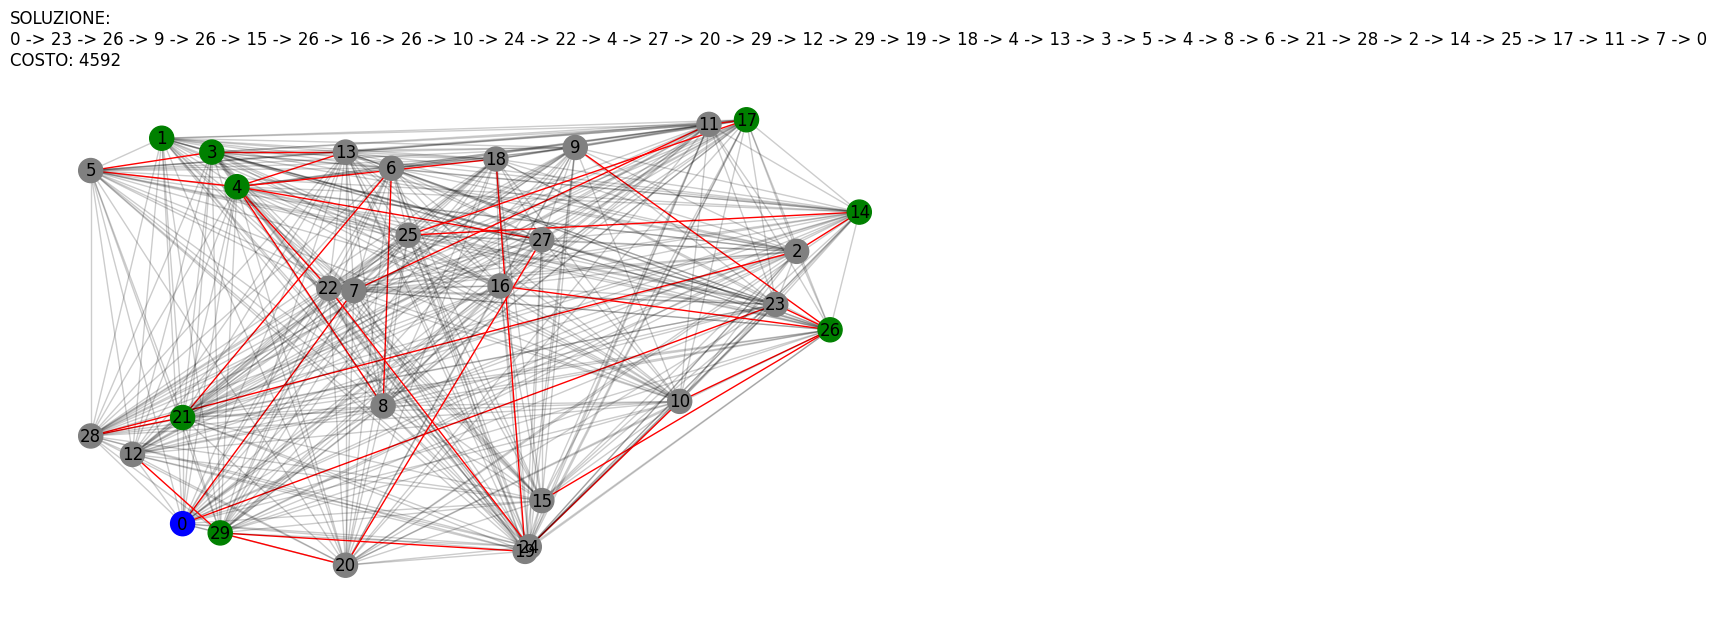

In [28]:
#RICHIEDE L'ESECUZIONE DELLA CELLA PRECEDENTE
import networkx as nx 
import utility_function as uf

#Caricamento del grafo da file
#scelta istanza

graph_file = "istances/graph2.gml"
batteria_max = 250

#lettura grafo
G = nx.read_gml(graph_file, destringizer=int)

#applicazione algoritmo
soluzione, batteria_per_nodo = greedy_random_insertion(G,batteria_max)

#aggiungiamo le colonnine necessarie
soluzione, batteria_per_nodo = uf.add_colonnine_to_tour(G, soluzione, batteria_per_nodo, batteria_max)


#controllo se la soluzione siste
if soluzione == None:
    print("soluzione non trovata. Batteria insufficiente per raggiungere tutti i clienti")
else:
    print("soluzione trovata:")
    print(soluzione)
    
    print("batteria_per_nodo:")
    print(batteria_per_nodo)

    costo = uf.costo(G,soluzione, batteria_per_nodo)
   
    #costo = uf.costo(G, soluzione, batteria_per_nodo)
    print("costo: ", costo)

    #plot the solution
    uf.draw_solution(G, soluzione , costo)

In [52]:
import networkx as nx
import utility_function as uf

#RICHIEDE L'ESECUZIONE DELLA CELLA PRECEDENTE
import networkx as nx 
import utility_function as uf

#Caricamento del grafo da file
#scelta istanza
graph_file = "istances/graph.gml"
batteria_max = 150

#lettura grafo
G = nx.read_gml(graph_file, destringizer=int)

#applicazione algoritmo
soluzione, batteria_per_nodo = greedy_cheapest_insertion(G,batteria_max)
        
        
        

### FARTHEST INSERTION 
Questa euristica inizia con un percorso contenente un solo punto. In ogni passo, trova il punto non ancora incluso nel percorso che è il più lontano da ogni punto esistente nel percorso e richiede il minor costo per essere inserito. Questo processo viene ripetuto fino a quando tutti i punti non sono stati inseriti.

In [17]:
import networkx as nx 
import utility_function as uf

def greedy_farthest_insertion(G : nx.Graph, batteria_max : int):
    
    clienti = [node for node in G.nodes if G.nodes[node]['type'] == "cliente"]
    collonnine = [node for node in G.nodes if G.nodes[node]['type'] == "colonnina"]

    #inizializzazione
    nodo_attuale = 0
    batteria = batteria_max
    nodi_visitati = []
    nodi_da_visitare = clienti.copy() #devo anche tornare al deposito quindi lo devo visitare una seconda volta
    soluzione = [0]
    colonnine_visitate = [] #per evitare cicli
    batteria_per_nodo = [batteria_max] #per ogni nodo della soluzione salvo la batteria rimanente ()

    tour = []
    soluzione_trovata = True
    farthest_node = (0,0)
    
    #inizializzazione soluzione
        
        # inizio il tour dal deposito 
    tour = [nodo_attuale]
    #print(nodi_da_visitare)
    # trovo il nodo più vicino al deposito
    first_best = uf.get_farthest_node(G, nodo_attuale, nodi_da_visitare)
    # aggiungo il nodo alla soluzione
    #first_best è una tupla (dist, nodo)
    tour.append(first_best[1])
    tour.append(0)
    nodi_da_visitare.remove(first_best[1])

    
    
     #controllo se ci posso arrivare
    while len(nodi_da_visitare) > 0:

        #print("nodi da visitare:", nodi_da_visitare)
        farthest_node = (int(0),0)
        
        #prendo il nodo più lontano dal tour 
        for i in tour:
            far_node = uf.get_farthest_node(G, i, nodi_da_visitare)
            #print("farnode", far_node)
            if far_node[0] > farthest_node[0]:
                farthest_node = far_node

        #print("nodo farthest:",farthest_node[1])
        best_inserzione = (int(100000000),0)
        for i in range(len(tour)-1):
                        
            #prendo a due a due i nodi in tour 
            nodo_attuale = tour[i]
            nodo_successivo = tour[i+1]

            #costo deviazione da i a nodo nuovo piu da nodo nuovo a i+1
            inserzione = G[nodo_attuale][int(farthest_node[1])]['weight'] + G[int(farthest_node[1])][nodo_successivo]['weight']
            #coppia costo totale deviazione e nodo da cui passare
            
            if inserzione < best_inserzione[0]:
                    best_inserzione = ( inserzione, farthest_node[1])
                    best_inserzione_index = i+1
                                

        #inserisco il nodo nella soluzione
        tour.insert(best_inserzione_index,best_inserzione[1])
        nodi_da_visitare.remove(best_inserzione[1])
        
       # print("Inserito:",farthest_node[1])
       # print("tour:", tour)

        batteria_per_nodo = uf.calcolo_batteria_per_nodo(G,tour,batteria_max)
                            
        #check if the battery is enough to go to the farthest node and to reach the farthest charging station
        if batteria_per_nodo[best_inserzione_index] - uf.get_nearest_node(G, farthest_node[1], collonnine)[0] < 0:
    
           # print("serve una colonnina prima di: " , tour[best_inserzione_index])

            #go to the nearest charging station
            nodo_colonnina = uf.cheapest_deviation(G, tour[best_inserzione_index-1], tour[best_inserzione_index], collonnine) #la colonnina più vicina
         

            #aggiornamento dello stato
            tour.insert(best_inserzione_index,nodo_colonnina[1])
            #print("aggiunta colonnina.", nodo_colonnina[1], "Tour:", tour)
        
        #nodi_visitati.append(farthest_node[1])
        #nodo_attuale = nodo_colonnina[1]
       

    return tour, batteria_per_nodo
    


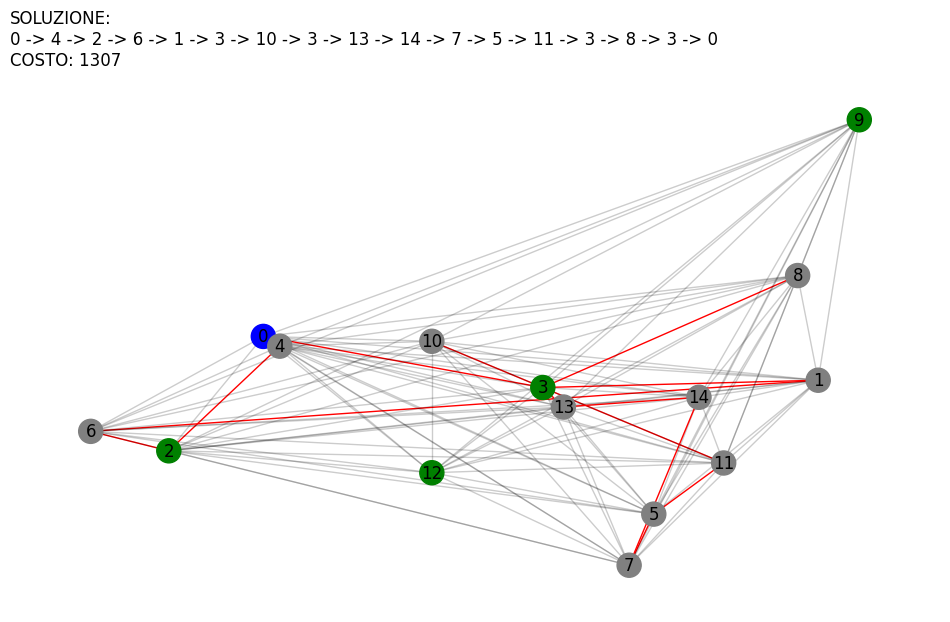

In [2]:


#RICHIEDE L'ESECUZIONE DELLA CELLA PRECEDENTE
import networkx as nx 
import utility_function as uf


#Caricamento del grafo da file
#scelta istanza
graph_file = "istances/graph.gml"
batteria_max = 200

#lettura grafo
G = nx.read_gml(graph_file, destringizer=int)

#applicazione algoritmo
soluzione, batteria_per_nodo = greedy_farthest_insertion(G,batteria_max)

#aggiungiamo le colonnine necessarie
soluzione, batteria_per_nodo = uf.add_colonnine_to_tour(G, soluzione, batteria_per_nodo, batteria_max)

costo = uf.costo(G,soluzione, batteria_per_nodo)

#costo = uf.costo(G, soluzione, batteria_per_nodo)
#print("costo: ", costo)

#plot the solution
uf.draw_solution(G, soluzione , costo)

## Local search

Data una soluzione ottenuta da algoritmo greedy, si cerca di migliorarla usando la ricerca locale.

### City Swap

Data la soluzione nello forma di vettore di nodi visitati (in ordine) l'intorno è dato da tutte le soluzioni che si ottengono scambiando due nodi. Ci si ferma se non di in grado di determinare una soluzione migliore di quella attuale.

In [94]:
import networkx as nx
import utility_function as uf

def city_swap(G : nx.Graph, soluzione : list, batteria_per_nodo : list):
    
    batteria_max = batteria_per_nodo[0]

    soluzione_attuale = soluzione
    costo_attuale = uf.costo(G, soluzione_attuale, batteria_per_nodo)

    #scorro la soluzione (escluso il primo nodo e ultimo nodo)
    for i in range(1,len(soluzione)-1):
        #scorro la soluzione (escluso il primo nodo e ultimo nodo)
        for j in range(i+1,len(soluzione)-1):
           
            #scambio i e j
            nuova_soluzione = soluzione_attuale.copy()
            nuova_soluzione[i], nuova_soluzione[j] = nuova_soluzione[j], nuova_soluzione[i]

            batteria_per_nodo = uf.calcolo_batteria_per_nodo(G,nuova_soluzione,batteria_max)
            #print(nuova_soluzione)

            #controllo se la batteria è negativa (altrimenti soluzione non ammissibile)
            if uf.check_batteria_negativa(batteria_per_nodo) == True:
                #print("batteria negativa")
                nuova_soluzione, batteria_per_nodo= uf.add_colonnine_to_tour(G,nuova_soluzione,batteria_per_nodo,batteria_per_nodo[0])
                

            costo_nuova_soluzione = uf.costo(G, nuova_soluzione, batteria_per_nodo)
            #print("swap",i,j,costo_nuova_soluzione)
            #se il costo è minore allora aggiorno la soluzione
            if costo_nuova_soluzione < costo_attuale:
                print("soluzione migliore trovata, con costo: ", costo_nuova_soluzione)
                soluzione_attuale = nuova_soluzione
                costo_attuale = costo_nuova_soluzione

                return soluzione_attuale, batteria_per_nodo
    
    batteria_per_nodo = uf.calcolo_batteria_per_nodo(G,soluzione_attuale,batteria_max)
    return soluzione_attuale, batteria_per_nodo
    

def local_city_swap(G : nx.Graph, soluzione : list, batteria_per_nodo : list):
    migliorato = True

    soluzione_attuale = soluzione.copy()
    batteria_per_nodo_attuale = batteria_per_nodo.copy()

    while migliorato:
        soluzione_nuova, batteria_per_nodo_nuova = city_swap(G, soluzione_attuale, batteria_per_nodo)
        
        if soluzione_nuova == soluzione or uf.costo(G,soluzione_nuova,batteria_per_nodo_nuova) == uf.costo(G,soluzione_attuale,batteria_per_nodo_attuale):
            migliorato = False
        
        soluzione_attuale = soluzione_nuova
        batteria_per_nodo_attuale = batteria_per_nodo_nuova

   
    return soluzione_nuova, batteria_per_nodo_nuova

COSTO VECCCHIO:  1186
Improvement trovato 1154
Improvement trovato 1145
Improvement trovato 1098
Improvement trovato 1078
Improvement trovato 1070
Improvement trovato 1037
Improvement trovato 971
Improvement trovato 962
Improvement trovato 930
Improvement trovato 927
Improvement trovato 905
soluzione trovata:
[0, 10, 3, 14, 1, 8, 3, 11, 5, 7, 3, 13, 12, 2, 6, 4, 0]
batteria_per_nodo:
[150, 108.95124849645242, 150, 111.7900536509144, 81.9571858705618, 38.66746422673508, 150, 96.17621343680844, 69.15770126459584, 47.317371596754285, 150, 140.5660188679434, 150, 150, 129.3844718719117, 71.583087805438, 65.92623355594561]
COSTO NUOVO:  905


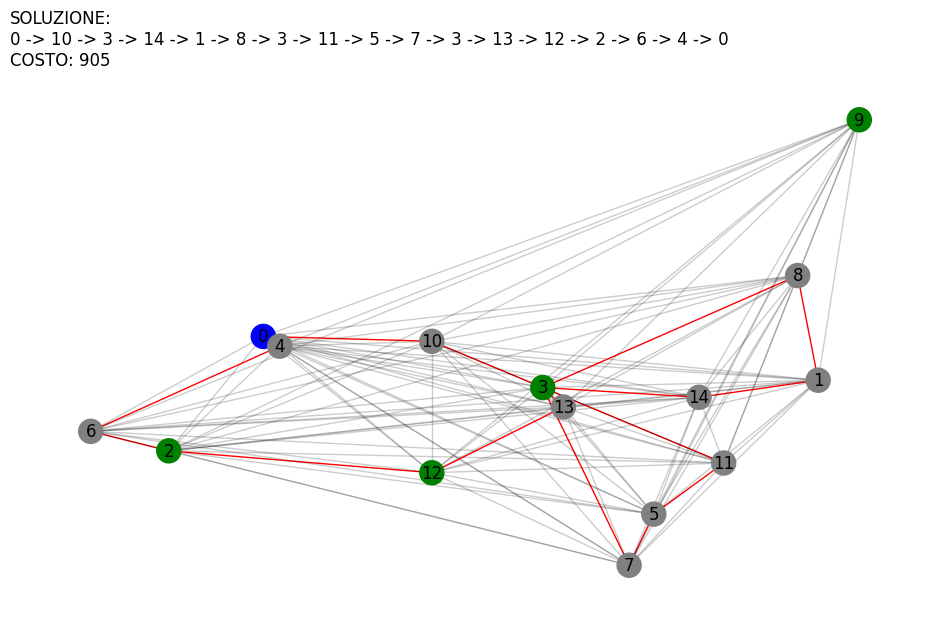

In [40]:
#RICHIEDE L'ESECUZIONE DELLA CELLA PRECEDENTE E DI QUELLA CON LA GREEDY VOLUTA
import networkx as nx 
import utility_function as uf

#Caricamento del grafo da file
#scelta istanza
graph_file = "istances/graph.gml"
batteria_max = 150

#lettura grafo
G = nx.read_gml(graph_file, destringizer=int)

#applicazione algoritmo greedy
soluzione, batteria_per_nodo = greedy_cheapest_insertion(G,batteria_max)

#aggiungiamo le colonnine necessarie per renderla ammissibile
soluzione, batteria_per_nodo = uf.add_colonnine_to_tour(G, soluzione, batteria_per_nodo, batteria_max)

costo= uf.costo(G,soluzione, batteria_per_nodo)
print("COSTO VECCCHIO: ", costo)

#ricerca locale
soluzione, batteria_per_nodo = local_city_insertion(G, soluzione, batteria_per_nodo)


#controllo se la soluzione siste
if soluzione == None:
    print("soluzione non trovata. Batteria insufficiente per raggiungere tutti i clienti")
else:
    print("soluzione trovata:")
    print(soluzione)
    
    batteria_per_nodo= uf.calcolo_batteria_per_nodo(G, soluzione, batteria_max)
    print("batteria_per_nodo:")
    print(batteria_per_nodo)

    costo = uf.costo(G,soluzione, batteria_per_nodo)
    print("COSTO NUOVO: ", costo)
   
    #costo = uf.costo(G, soluzione, batteria_per_nodo)
    #print("costo: ", costo)

    #plot the solution
    uf.draw_solution(G, soluzione , costo)

### 2-opt

In [7]:
def two_2opt_swap(path, i, k):
    new_path = path[:i] + path[i:k+1][::-1] + path[k+1:]
    return new_path

def opt_swap_intorno(G, soluzione, batteria_per_nodo):
    batteria_max = batteria_per_nodo[0]

    soluzione_attuale = soluzione.copy()
    costo_attuale = uf.costo(G, soluzione_attuale, batteria_per_nodo)

    #scorro la soluzione (escluso il primo nodo e ultimo nodo)
    for i in range(1,len(soluzione)-1):
        #scorro la soluzione (escluso il primo nodo e ultimo nodo)
        for j in range(i+2,len(soluzione)-1):

    
            #scambio i e j
            #nuova_soluzione = soluzione_attuale.copy()
            nuova_soluzione = two_2opt_swap(soluzione_attuale, i, j)

            #print(nuova_soluzione)
           
            batteria_per_nodo_nuova = uf.calcolo_batteria_per_nodo(G,nuova_soluzione,batteria_max)

            #controllo se la batteria è negativa (altrimenti soluzione non ammissibile)
            if uf.check_batteria_negativa(batteria_per_nodo_nuova) == True:
                #print("batteria negativa")
                nuova_soluzione, batteria_per_nodo_nuova = uf.add_colonnine_to_tour(G,nuova_soluzione,batteria_per_nodo_nuova,batteria_per_nodo[0])
                
           
            costo_nuova_soluzione = uf.costo(G, nuova_soluzione, batteria_per_nodo_nuova)
           
            #se il costo è minore allora aggiorno la soluzione
            if costo_nuova_soluzione < costo_attuale:
                #print("soluzione migliore trovata, con costo: ", costo_nuova_soluzione, costo_attuale)
                soluzione_attuale = nuova_soluzione
                costo_attuale = costo_nuova_soluzione

                batteria_per_nodo_nuova = uf.calcolo_batteria_per_nodo(G,nuova_soluzione,batteria_max)

                return soluzione_attuale, batteria_per_nodo_nuova
    
    
    batteria_per_nodo_nuova = uf.calcolo_batteria_per_nodo(G,soluzione_attuale,batteria_max)
    return soluzione_attuale, batteria_per_nodo


def local_2opt_swap(G, soluzione, batteria_per_nodo):
    migliorato = True

    soluzione_attuale = soluzione.copy()
    batteria_per_nodo_attuale = batteria_per_nodo.copy()

    while migliorato:
        soluzione_nuova, batteria_per_nodo_nuova = opt_swap_intorno(G, soluzione_attuale, batteria_per_nodo_attuale)
        
        if soluzione_nuova == soluzione or uf.costo(G,soluzione_nuova,batteria_per_nodo_nuova) == uf.costo(G,soluzione_attuale,batteria_per_nodo_attuale):
            migliorato = False
        
        soluzione_attuale = soluzione_nuova
        batteria_per_nodo_attuale = batteria_per_nodo_nuova

    return soluzione_nuova, batteria_per_nodo_nuova

### City insertion

In [36]:
import networkx as nx
import numpy as np
def city_insertion_best_improvement(G : nx.Graph, soluzione : list, batteria_per_nodo : list):

    soluzione_best = soluzione
    batteria_per_nodo_best = batteria_per_nodo
    costo_best = uf.costo(G,soluzione,batteria_per_nodo)

       #scorro la soluzione (escluso il primo nodo e ultimo nodo)
    for i in range(1,len(soluzione)-1):
        #scorro la soluzione (escluso il primo nodo e ultimo nodo)
        for j in range(i+1,len(soluzione)-1):

            soluzione_temp = soluzione.copy()

            #rimuovo il nodo i-esimo
            soluzione_temp.remove(soluzione[i])
            #lo riposizioni in posizione j-esima
            soluzione_temp.insert(j,soluzione[i])

            #calcolo il costo della nuova soluzione
            batteria_per_nodo_temp = uf.calcolo_batteria_per_nodo(G,soluzione_temp,batteria_per_nodo[0])
            costo_temp = uf.costo(G,soluzione_temp,batteria_per_nodo_temp)

            if uf.check_batteria_negativa(batteria_per_nodo_temp) == False:
                if costo_temp < costo_best:
                    print("Improvement trovato", costo_temp)
                    #print(batteria_per_nodo_temp)
                    costo_best = costo_temp
                    soluzione_best = soluzione_temp
                    batteria_per_nodo_best = batteria_per_nodo_temp
   
    return soluzione_best, batteria_per_nodo_best


def local_city_insertion(G : nx.Graph, soluzione : list, batteria_per_nodo : list):
    migliorato = True

    soluzione_attuale = soluzione.copy()
    batteria_per_nodo_attuale = batteria_per_nodo.copy()

    while migliorato:
        soluzione_nuova, batteria_per_nodo_nuova = city_insertion_best_improvement(G, soluzione_attuale, batteria_per_nodo_attuale)
        
        if soluzione_nuova == soluzione or uf.costo(G,soluzione_nuova,batteria_per_nodo_nuova) == uf.costo(G,soluzione_attuale,batteria_per_nodo_attuale):
            migliorato = False
        
        soluzione_attuale = soluzione_nuova
        batteria_per_nodo_attuale = batteria_per_nodo_nuova

    return soluzione_nuova, batteria_per_nodo_nuova


### 3-opt

In [4]:
import itertools
import utility_function as uf


def intorno3opt(G,soluzione,batteria_per_nodo):
    #inizializzazione
    batteria_max = batteria_per_nodo[0]
    best_cost = uf.costo(G,soluzione, batteria_per_nodo)


    allcombinantions = list(itertools.permutations(range(1, len(soluzione)-1),3))

    for lista_taglio in allcombinantions:
        sol_list = uf.generate_combination(soluzione, lista_taglio)

        best_in_list=100000000
        best_sol = None

        #cerchiamo in sol_list la soluzione migliore
        for i in sol_list:
            
            batteria_per_nodo = uf.calcolo_batteria_per_nodo(G, i, batteria_max)
            costo = uf.costo(G,i, batteria_per_nodo)
            batteria_per_nodo_temp = uf.calcolo_batteria_per_nodo(G, i, batteria_max)
            if costo < best_in_list and uf.check_batteria_negativa(batteria_per_nodo_temp) == False:
                #print(i)
                best_in_list = costo
                best_sol = i
                batteria_per_nodo_list = batteria_per_nodo_temp

        #print("Best in list: ", best_in_list)
        
        if best_in_list < best_cost:
            #print("Trovata soluzione migliore", best_in_list)
            best_cost = best_in_list
            soluzione = best_sol
            batteria_per_nodo = batteria_per_nodo_list

        
    return soluzione, batteria_per_nodo

def local_3opt(G,soluzione,batteria_per_nodo):
    migliorato = True

    soluzione_attuale = soluzione.copy()
    batteria_per_nodo_attuale = batteria_per_nodo.copy()

    while migliorato:
        print("miglioro")
        soluzione_nuova, batteria_per_nodo_nuova = intorno3opt(G, soluzione_attuale, batteria_per_nodo_attuale)
        
        if soluzione_nuova == soluzione or uf.costo(G,soluzione_nuova,batteria_per_nodo_nuova) == uf.costo(G,soluzione_attuale,batteria_per_nodo_attuale):
            migliorato = False
        
        soluzione_attuale = soluzione_nuova
        batteria_per_nodo_attuale = batteria_per_nodo_nuova

    return soluzione_nuova, batteria_per_nodo_nuova
    
        

COSTO VECCCHIO:  1801
miglioro
miglioro
COSTO NUOVO:  865
[150, 144.34314575050763, 107.28913112320981, 150, 150, 150, 111.7900536509144, 81.9571858705618, 38.66746422673508, 150, 150, 140.5660188679434, 95.28909317725632, 68.27058100504372, 46.430251337202165, 150, 150, 129.3844718719117, 150, 150, 97.67409819219549]
[0, 4, 10, 3, 3, 3, 14, 1, 8, 3, 3, 13, 11, 5, 7, 12, 2, 2, 6, 2, 0]


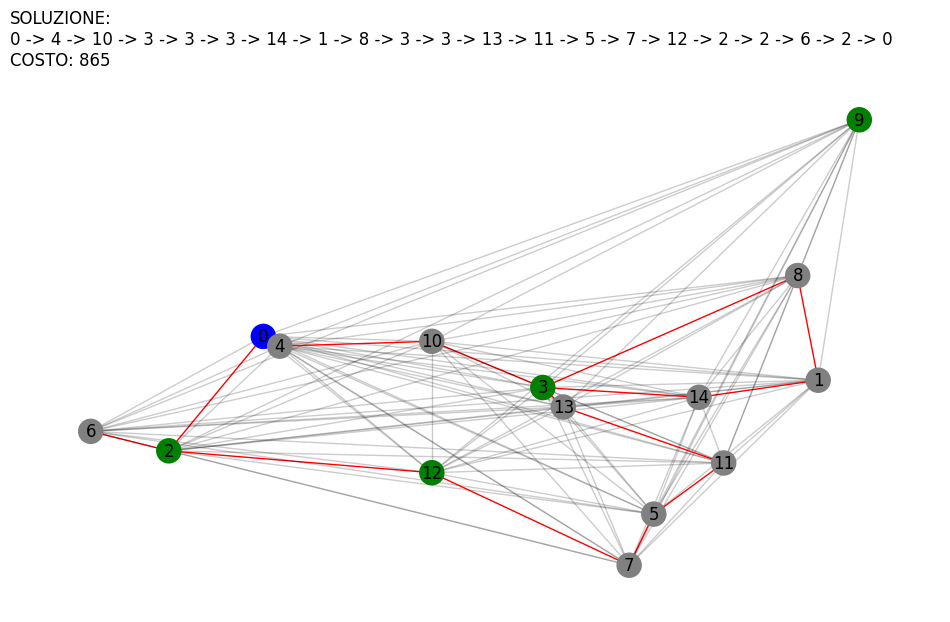

In [5]:
import itertools
import networkx as nx 
import utility_function as uf

#Caricamento del grafo da file
#scelta istanza
graph_file = "istances/graph.gml"
batteria_max = 150

#lettura grafo
G = nx.read_gml(graph_file, destringizer=int)

#applicazione algoritmo greedy
soluzione, batteria_per_nodo = greedy_random_insertion(G,batteria_max)

#aggiungiamo le colonnine necessarie per renderla ammissibile
soluzione, batteria_per_nodo = uf.add_colonnine_to_tour(G, soluzione, batteria_per_nodo, batteria_max)

costo= uf.costo(G,soluzione, batteria_per_nodo)
print("COSTO VECCCHIO: ", costo)


soluzione, batteria_per_nodo = local_3opt(G, soluzione, batteria_per_nodo)
costo= uf.costo(G,soluzione, batteria_per_nodo)

print("COSTO NUOVO: ", costo)

print(batteria_per_nodo)
print(soluzione)

uf.draw_solution(G, soluzione, costo)



## Tabu search

Che come tutti sanno deriva dal Tongano lingua della polinesia e significa "che è proibito" o "che è tabù".

In [2]:
import itertools
import utility_function as uf


def tabu_intorno3opt(G,soluzione,batteria_per_nodo, tabu_list):
    #inizializzazione
    batteria_max = batteria_per_nodo[0]
    best_cost = uf.costo(G,soluzione, batteria_per_nodo)


    allcombinantions = list(itertools.permutations(range(1, len(soluzione)-1),3))

    for lista_taglio in allcombinantions:
        sol_list = uf.generate_combination(soluzione, lista_taglio)

        best_in_list=100000000
        best_sol = None

        #cerchiamo in sol_list la soluzione migliore
        for i in sol_list:
            
            batteria_per_nodo = uf.calcolo_batteria_per_nodo(G, i, batteria_max)
            costo = uf.costo(G,i, batteria_per_nodo)
            batteria_per_nodo_temp = uf.calcolo_batteria_per_nodo(G, i, batteria_max)
            if costo < best_in_list and uf.check_batteria_negativa(batteria_per_nodo_temp) == False and i not in tabu_list:
                #print(i)
                best_in_list = costo
                best_sol = i
                batteria_per_nodo_list = batteria_per_nodo_temp

        #print("Best in list: ", best_in_list)
        
        if best_in_list < best_cost:
            #print("Trovata soluzione migliore", best_in_list)
            best_cost = best_in_list
            soluzione = best_sol
            batteria_per_nodo = batteria_per_nodo_list

        
    return soluzione, batteria_per_nodo

def tabu_3opt(G,soluzione,batteria_per_nodo, tabu_list_len, max_iter):
    
    iter_no_improvement = 0
    tabu_list = [soluzione]

    best_soluzione = soluzione
    best_batteria_per_nodo = batteria_per_nodo
    best_cost = uf.costo(G,soluzione, batteria_per_nodo)

    while iter_no_improvement < max_iter:
        print("Iterazione: ", iter_no_improvement)
        soluzione_nuova, batteria_per_nodo_nuova = tabu_intorno3opt(G, soluzione, batteria_per_nodo, tabu_list)
        
        costo_temp = uf.costo(G,soluzione_nuova, batteria_per_nodo_nuova)
        soluzione = soluzione_nuova
        batteria_per_nodo = batteria_per_nodo_nuova

        tabu_list.append(soluzione)

        if len(tabu_list) > tabu_list_len:
            tabu_list.pop(0)


        if costo_temp < best_cost:
            best_cost = costo_temp
            best_soluzione = soluzione
            best_batteria_per_nodo = batteria_per_nodo
            iter_no_improvement = 0
        else:
            soluzione = soluzione_nuova
            batteria_per_nodo = batteria_per_nodo_nuova
            iter_no_improvement += 1
            
       
    return best_soluzione, best_batteria_per_nodo
    

COSTO VECCCHIO:  3327
Iterazione:  0
Iterazione:  0
Iterazione:  1
Iterazione:  2
Iterazione:  3
Iterazione:  0
Iterazione:  1
Iterazione:  2
Iterazione:  3
COSTO NUOVO:  1536
[150, 150, 150, 116.8941092855063, 73.47752259332148, 71.2414546158217, 51.017706199665014, 150, 101.74028595194538, 30.712122523626334, 150, 132.9706136340736, 109.43340904219396, 150, 150, 150, 150, 140.7804555427071, 107.25434631422668, 87.60746360983818, 62.28948580749385, 49.25108099708855, 150, 114.3068634048505, 150, 150, 103.93482877487591, 71.87238969111311, 49.511709916115215, 14.454613630199006, 8.371851099900788, 150, 130.0, 150, 126.59060017856075, 150, 104.0]
[0, 29, 29, 20, 19, 24, 15, 21, 8, 10, 26, 23, 2, 17, 17, 17, 17, 11, 9, 18, 6, 13, 4, 5, 4, 4, 25, 27, 16, 7, 22, 21, 12, 28, 21, 21, 0]


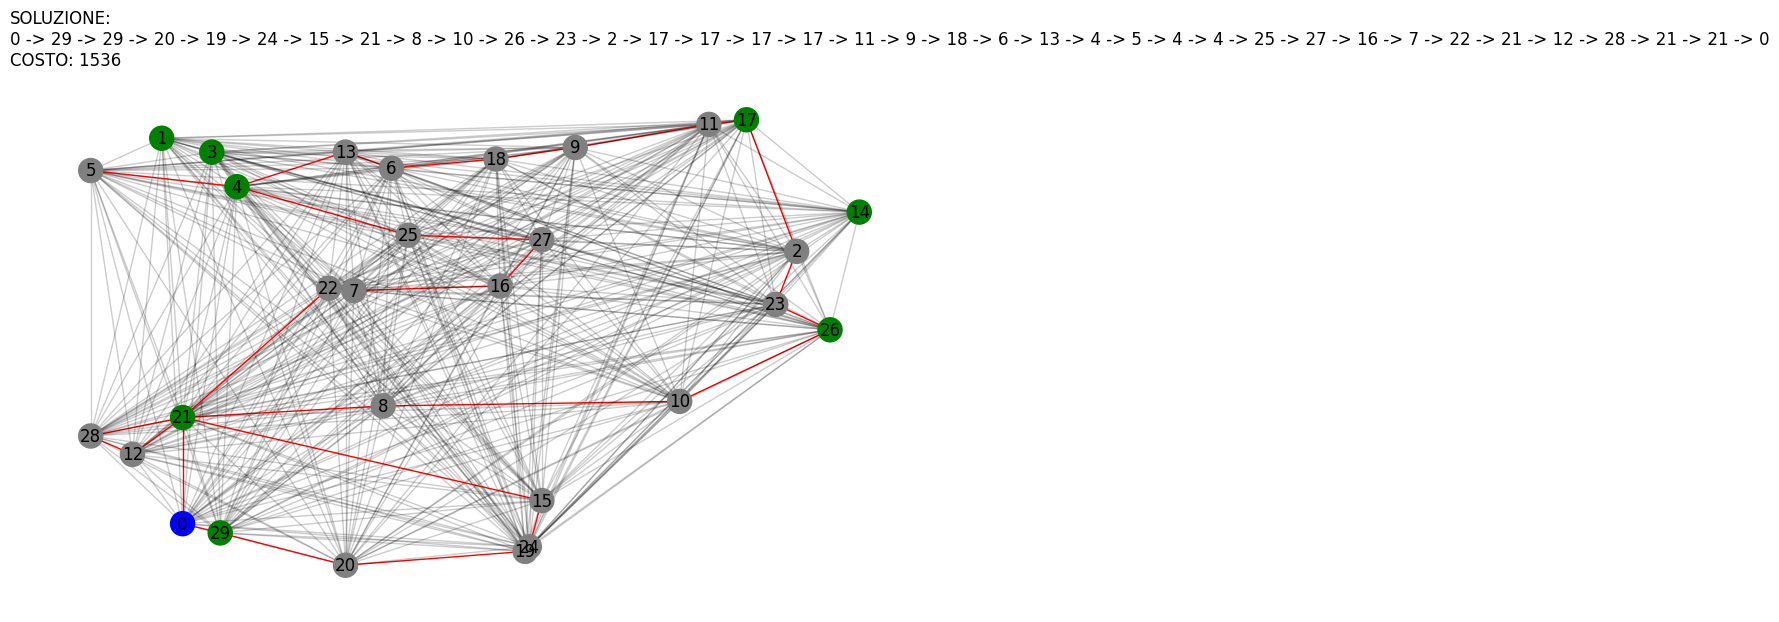

In [18]:
import itertools
import networkx as nx 
import utility_function as uf

#Caricamento del grafo da file
#scelta istanza
graph_file = "istances/USA.gml"
batteria_max = 150

#lettura grafo
G = nx.read_gml(graph_file, destringizer=int)

#applicazione algoritmo greedy
soluzione, batteria_per_nodo = greedy_farthest_insertion(G,batteria_max)

#aggiungiamo le colonnine necessarie per renderla ammissibile
soluzione, batteria_per_nodo = uf.add_colonnine_to_tour(G, soluzione, batteria_per_nodo, batteria_max)

costo= uf.costo(G,soluzione, batteria_per_nodo)
print("COSTO VECCCHIO: ", costo)


soluzione, batteria_per_nodo = tabu_3opt(G, soluzione, batteria_per_nodo,4,4)
#soluzione, batteria_per_nodo = local_3opt(G, soluzione, batteria_per_nodo)
costo= uf.costo(G,soluzione, batteria_per_nodo)

print("COSTO NUOVO: ", costo)

print(batteria_per_nodo)
print(soluzione)

uf.draw_solution(G, soluzione, costo)

In [ ]:
import itertools
import networkx as nx 
import utility_function as uf

#Caricamento del grafo da file
#scelta istanza
graph_file = "istances/graph.gml"
batteria_max = 150

#lettura grafo
G = nx.read_gml(graph_file, destringizer=int)

#applicazione algoritmo greedy
soluzione, batteria_per_nodo = greedy_random_insertion(G,batteria_max)

#aggiungiamo le colonnine necessarie per renderla ammissibile
soluzione, batteria_per_nodo = uf.add_colonnine_to_tour(G, soluzione, batteria_per_nodo, batteria_max)

costo= uf.costo(G,soluzione, batteria_per_nodo)
print("COSTO VECCCHIO: ", costo)


soluzione, batteria_per_nodo = tabu_3opt(G, soluzione, batteria_per_nodo,2,20)
#soluzione, batteria_per_nodo = local_3opt(G, soluzione, batteria_per_nodo)
costo= uf.costo(G,soluzione, batteria_per_nodo)

print("COSTO NUOVO: ", costo)

print(batteria_per_nodo)
print(soluzione)

uf.draw_solution(G, soluzione, costo)